<a href="https://colab.research.google.com/github/bbcx-investments/notebooks/blob/main/options/option_greeks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from scipy.stats import norm


def callBS(S,K,T,sigma,r,q) :
    def f(s) :
        s = s if s!=0 else 1.0e-6
        d1 = ( np.log(s/K) + (r-q+0.5*sigma**2)*T ) / (sigma*np.sqrt(T))
        d2 = d1 - sigma*np.sqrt(T)
        return np.exp(-q*T)*s*norm.cdf(d1) - np.exp(-r*T)*K*norm.cdf(d2)
    if isinstance(S,list) or isinstance(S,np.ndarray) :
        return np.array([f(s) for s in S])
    else :
        return f(S)

def putBS(S,K,T,sigma,r,q) :
    def f(s) :
        s = s if s!=0 else 1.0e-6
        d1 = ( np.log(s/K) + (r-q+0.5*sigma**2)*T ) / (sigma*np.sqrt(T))
        d2 = d1 - sigma*np.sqrt(T)
        return np.exp(-r*T)*K*norm.cdf(-d2) - np.exp(-q*T)*s*norm.cdf(-d1)
    if isinstance(S,list) or isinstance(S,np.ndarray) :
        return np.array([f(s) for s in S])
    else :
        return f(S)

In [ ]:
def callGreeks(S,K,T,sigma,r,q):
    def f(s):
        s = s if s!=0 else 1.0e-6
        d1 = ( np.log(s/K) + (r-q+0.5*sigma**2)*T ) / (sigma*np.sqrt(T))
        d2 = d1 - sigma*np.sqrt(T)
        # delta
        delta = np.exp(-q*T) * norm.cdf(d1)
        # gamma
        gamma = np.exp(-q*T) * (1/(s*sigma*np.sqrt(T))) * norm.pdf(d1)
        # theta
        theta = -np.exp(-q*T) * (s*sigma/(2*np.sqrt(T))) * norm.pdf(d1)
        theta+= q*np.exp(-q*T) * s * norm.cdf(d1)
        theta+= -r*np.exp(-r*T) * K * norm.cdf(d2)
        # vega
        vega = np.exp(-q*T) * s * norm.pdf(d1) * np.sqrt(T)
        # rho
        rho = T*np.exp(-r*T) * K * norm.cdf(d2)
        return delta, gamma, theta, vega, rho
    if isinstance(S,list) or isinstance(S,np.ndarray) :
        return np.array([f(s) for s in S])
    else :
        return f(S)

def putGreeks(S,K,T,sigma,r,q):
    def f(s):
        s = s if s!=0 else 1.0e-6
        d1 = ( np.log(s/K) + (r-q+0.5*sigma**2)*T ) / (sigma*np.sqrt(T))
        d2 = d1 - sigma*np.sqrt(T)
        # delta
        delta = np.exp(-q*T) * norm.cdf(d1)
        delta+= -np.exp(-q*T)
        # gamma
        gamma = np.exp(-q*T) * (1/(s*sigma*np.sqrt(T))) * norm.pdf(d1)
        # theta
        theta = -np.exp(-q*T) * (s*sigma/(2*np.sqrt(T))) * norm.pdf(d1)
        theta+= q*np.exp(-q*T) * s * norm.cdf(d1)
        theta+= -r*np.exp(-r*T) * K * norm.cdf(d2)
        theta+= r*np.exp(-r*T)*K - q*np.exp(-q*T)*s
        # vega
        vega = np.exp(-q*T) * s * norm.pdf(d1) * np.sqrt(T)
        # rho
        rho = T*np.exp(-r*T) * K * norm.cdf(d2)
        rho+= -T*np.exp(-r*T)*K
        return delta, gamma, theta, vega, rho
    if isinstance(S,list) or isinstance(S,np.ndarray) :
        return np.array([f(s) for s in S])
    else :
        return f(S)

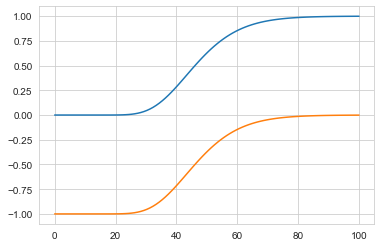

In [ ]:
K = 50
S = np.linspace(0,100,100)
sigma = 0.25
r = 0.05
q = 0
callgreeks= callGreeks(S,K,1,sigma,r,q)
putgreeks =  putGreeks(S,K,1,sigma,r,q)
plt.plot(S, callgreeks[:,0], label='delta')
plt.plot(S,  putgreeks[:,0], label='delta')

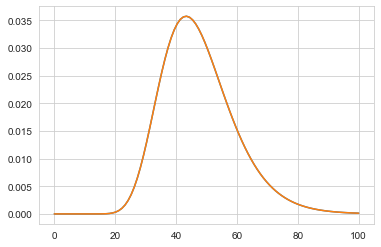

In [ ]:
plt.plot(S, callgreeks[:,1], label='gamma')
plt.plot(S,  putgreeks[:,1], label='gamma')

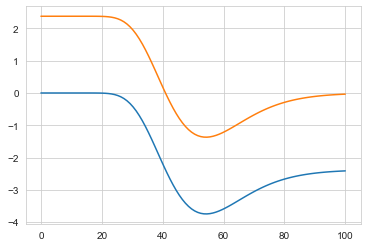

In [ ]:
plt.plot(S, callgreeks[:,2], label='theta')
plt.plot(S,  putgreeks[:,2], label='theta')

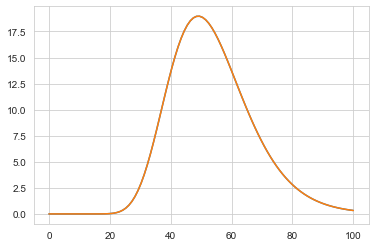

In [ ]:
plt.plot(S, callgreeks[:,3], label='vega')
plt.plot(S,  putgreeks[:,3], label='vega')

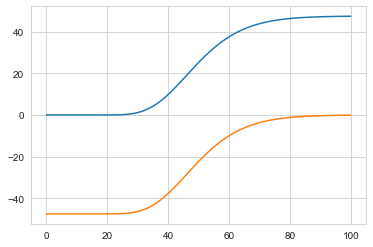

In [ ]:
plt.plot(S, callgreeks[:,4], label='rho')
plt.plot(S,  putgreeks[:,4], label='rho')